In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ModelLib

In [2]:
t_max = 100
model = ModelLib.SIRModels()

In [3]:
solve_dict_classic  = solve_ivp(model.ClassicIncrement, [0,t_max], [0.99,0.1,0.0,0 ,0] )

In [4]:
solve_dict_memory = solve_ivp(model.MemoryIncrement,[0,t_max], [0.99,0.1,0.0, 0, 0])

In [5]:
solve_dict_seasonal = solve_ivp(model.SeasonalyIncrement,[0,t_max], [0.99,0.1,0.0, 0, 0] )

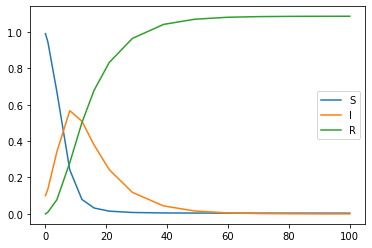

In [6]:
#print((solve_dict))
plt.plot(solve_dict_classic.t, solve_dict_classic.y[0,:], label="S")
plt.plot(solve_dict_classic.t, solve_dict_classic.y[1,:], label="I")
plt.plot(solve_dict_classic.t, solve_dict_classic.y[2,:], label="R")
plt.legend()
plt.show()

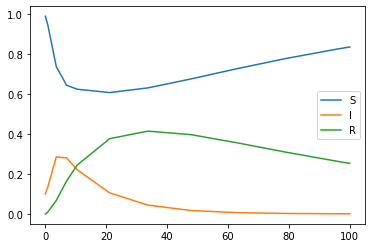

In [7]:
plt.plot(solve_dict_memory.t, solve_dict_memory.y[0,:], label="S")
plt.plot(solve_dict_memory.t, solve_dict_memory.y[1,:], label="I")
plt.plot(solve_dict_memory.t, solve_dict_memory.y[2,:], label="R")
plt.legend()
plt.show()

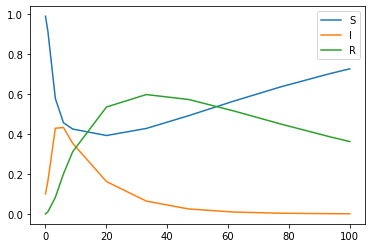

In [8]:
plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[0,:], label="S")
plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[1,:], label="I")
plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[2,:], label="R")
plt.legend()
plt.show()